# Quadratic Discriminant Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels

In [4]:
data_default = pd.read_excel("Default.xlsx",usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
print(data_default_dummies.head(5))
np.unique(data_default_dummies.default_Yes, return_counts = True)

       balance        income  default_Yes  student_Yes
0   729.526495  44361.625074            0            0
1   817.180407  12106.134700            0            1
2  1073.549164  31767.138947            0            0
3   529.250605  35704.493935            0            0
4   785.655883  38463.495879            0            0


(array([0, 1], dtype=uint8), array([9667,  333], dtype=int64))

In [6]:
# data_default_dummies.boxplot("balance","student_Yes", figsize = (12,5))
# plt.show()

In [8]:
# plt.figure(figsize = (12,5))
# sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
# plt.show()

In [10]:
# plt.figure(figsize = (12,5))
# sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
# plt.show()

In [11]:
# sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
#            hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
# plt.show()

In [13]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes
y = y.values
qda = QuadraticDiscriminantAnalysis(tol = 0.0000001)
mod_qda = qda.fit(X,y)
# print(mod_lda)
print(mod_qda.score(X,y))
pred = mod_qda.predict(X)
pred_prob = mod_qda.predict_proba(X)
actual = y
print(pred_prob)
np.unique(pred, return_counts = True)

0.973
[[9.99399518e-01 6.00481897e-04]
 [9.99483215e-01 5.16784793e-04]
 [9.90070289e-01 9.92971129e-03]
 ...
 [9.98812936e-01 1.18706395e-03]
 [8.29477120e-01 1.70522880e-01]
 [9.99999145e-01 8.55050878e-07]]


(array([0, 1], dtype=uint8), array([9875,  125], dtype=int64))

In [14]:
# def plot_confusion_matrix(y_true, y_pred, classes,
#                           normalize=False,
#                           title=None,
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if not title:
#         if normalize:
#             title = 'Normalized confusion matrix'
#         else:
#             title = 'Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

#     fig, ax = plt.subplots()
#     im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#     ax.figure.colorbar(im, ax=ax)
#     # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
#     return ax

In [16]:
tn, fp, fn, tp = confusion_matrix(y_true = actual, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

9636 31 239 94


In [15]:
# plot_confusion_matrix(y_true = actual, y_pred = pred, classes = np.array([0,1]))
# plt.show()

In [17]:
print(classification_report(actual, pred, digits = 6))

              precision    recall  f1-score   support

           0   0.975797  0.996793  0.986184      9667
           1   0.752000  0.282282  0.410480       333

   micro avg   0.973000  0.973000  0.973000     10000
   macro avg   0.863899  0.639538  0.698332     10000
weighted avg   0.968345  0.973000  0.967013     10000



In [19]:
fpr, tpr, thresholds = roc_curve(y_true = actual, y_score = pred_prob[:,0], pos_label = 0)
print(auc(fpr,tpr))

0.94921206507


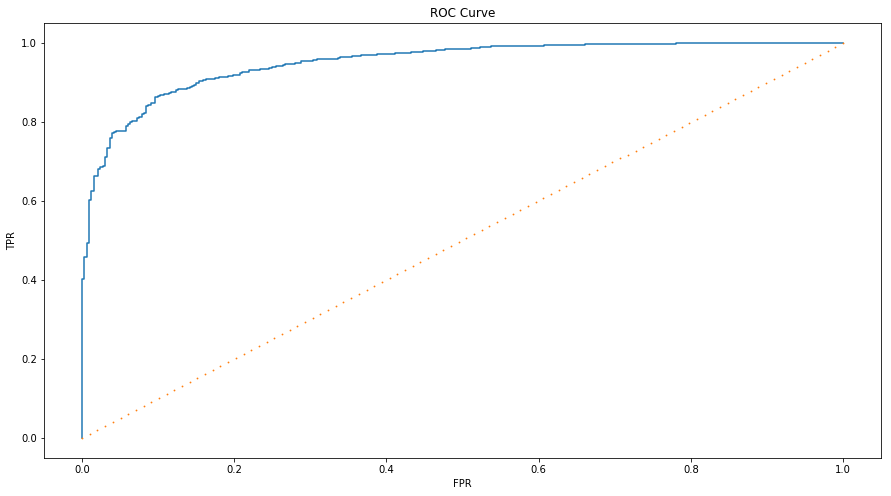

In [20]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(fpr, tpr) 
plt.plot(x,x,".", markersize = 1.6) 
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [21]:
precision, recall, thresholds = precision_recall_curve(y_true = actual, probas_pred = pred_prob[:,1], pos_label = 1)
print(auc(recall,precision))

0.524600525241


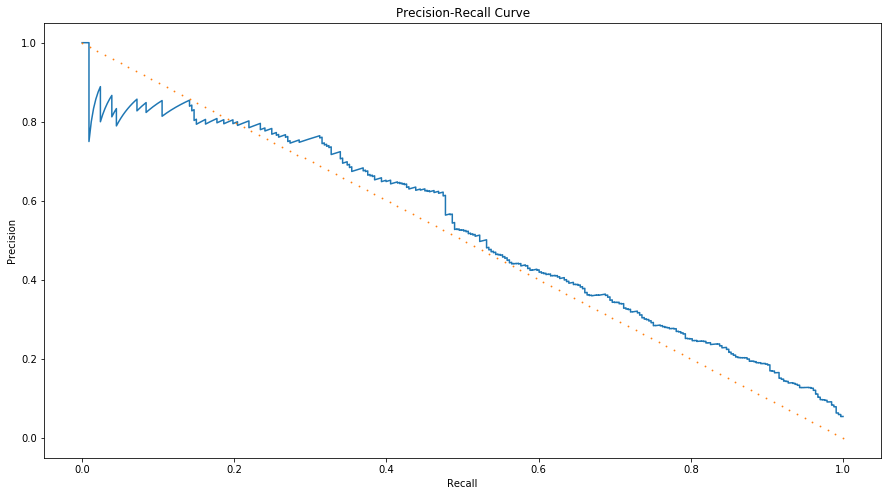

In [22]:
x= np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 
plt.plot(recall, precision) 
plt.plot(x,-x+1,".", markersize = 1.6) 
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [23]:
average_precision_score(y_true = actual, y_score = pred_prob[:,1])

0.52574746514510462